## *Imports and Exports of India (1997 - 2022)*

### Contents
* [Include relevant packages](#Include-relevant-packages)
* [Read the data](#Read-the-data)
* [Understand the data](#Understand-the-data)
* [Clean the data](#Clean-the-data)
* [Handle missing values](#Handle-missing-values)
* [Analysis](#Analysis)

## Include relevant packages

In [1]:
library(tidyverse)
library(scales)
library(treemap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## Read the data

In [2]:
trade_data = read_csv("../input/exports-and-imports-of-india19972022/exports and imports of india(1997-2022) - exports and imports.csv")

Rows: 5767 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Country
dbl (2): Year(start), Year(end)


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



## Understand the data

In [3]:
colnames(trade_data)

[1] "Country"       "Export"        "Import"        "Total Trade"  
[5] "Trade Balance" "Year(start)"   "Year(end)"

> Note: Import, Export, Total Trade and Trade Balance values are in Millions USD

In [4]:
head(trade_data)

Country,Export,Import,Total Trade,Trade Balance,Year(start),Year(end)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFGHANISTAN,21.25,10.70,31.95,10.55,97,98
AFGHANISTAN,12.81,28.14,40.95,-15.33,98,99
AFGHANISTAN,33.20,21.06,54.26,12.15,99,2000
AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002
AFGHANISTAN,60.77,18.46,79.23,42.31,2002,2003


In [5]:
summary(trade_data)

   Country              Export             Import          Total Trade      
 Length:5767        Min.   :    0.00   Min.   :    0.00   Min.   :    0.00  
 Class :character   1st Qu.:    3.15   1st Qu.:    1.13   1st Qu.:   12.92  
 Mode  :character   Median :   46.37   Median :   26.89   Median :  131.17  
                    Mean   :  818.35   Mean   : 1326.56   Mean   : 2240.64  
                    3rd Qu.:  360.04   3rd Qu.:  442.76   3rd Qu.:  972.47  
                    Max.   :55786.38   Max.   :76380.70   Max.   :89714.23  
                    NA's   :8          NA's   :532        NA's   :566       
 Trade Balance        Year(start)     Year(end)   
 Min.   :-63047.16   Min.   :  97   Min.   :  98  
 1st Qu.:   -27.11   1st Qu.:2003   1st Qu.:2004  
 Median :     3.29   Median :2009   Median :2010  
 Mean   :  -429.80   Mean   :1789   Mean   :1863  
 3rd Qu.:    66.98   3rd Qu.:2015   3rd Qu.:2016  
 Max.   : 24442.38   Max.   :2021   Max.   :2022  
 NA's   :566               

## Clean the Data

In [6]:
trade_data$`Year(start)` <- ifelse(
  trade_data$`Year(start)` < 2000, 
  1900 + trade_data$`Year(start)`, 
  trade_data$`Year(start)`
)
trade_data$`Year(end)` <- ifelse(
  trade_data$`Year(end)` < 2000, 
  1900 + trade_data$`Year(end)`, 
  trade_data$`Year(end)`
)

In [7]:
trade_data <- mutate(
  trade_data, 
  `Year(range)` = paste(
    `Year(start)`, 
    "-", 
    `Year(end)`, 
    sep = ""
  )
)

## Handle missing values

In [8]:
trade_data <- trade_data %>% 
  group_by(Country) %>% 
  filter(n()==25)

In [9]:
trade_data <- trade_data %>%
  group_by(Country) %>%
  filter(
    sum(is.na(`Export`))==0 & 
    sum(is.na(`Import`))==0 &
    sum(is.na(`Total Trade`))==0 &
    sum(is.na(`Trade Balance`))==0
  )

In [10]:
summary(trade_data)

   Country              Export             Import          Total Trade      
 Length:3350        Min.   :    0.02   Min.   :    0.01   Min.   :    0.26  
 Class :character   1st Qu.:   48.28   1st Qu.:   19.32   1st Qu.:   94.47  
 Mode  :character   Median :  226.76   Median :  165.64   Median :  459.22  
                    Mean   : 1363.20   Mean   : 1992.31   Mean   : 3355.51  
                    3rd Qu.:  901.94   3rd Qu.: 1065.69   3rd Qu.: 2235.35  
                    Max.   :55786.38   Max.   :76380.70   Max.   :89714.23  
 Trade Balance        Year(start)     Year(end)    Year(range)       
 Min.   :-63047.16   Min.   :1997   Min.   :1998   Length:3350       
 1st Qu.:  -201.78   1st Qu.:2003   1st Qu.:2004   Class :character  
 Median :     9.25   Median :2009   Median :2010   Mode  :character  
 Mean   :  -629.10   Mean   :2009   Mean   :2010                     
 3rd Qu.:   147.46   3rd Qu.:2015   3rd Qu.:2016                     
 Max.   : 24442.38   Max.   :2021   Max. 

## Analysis

#### Scatter plot for import over years

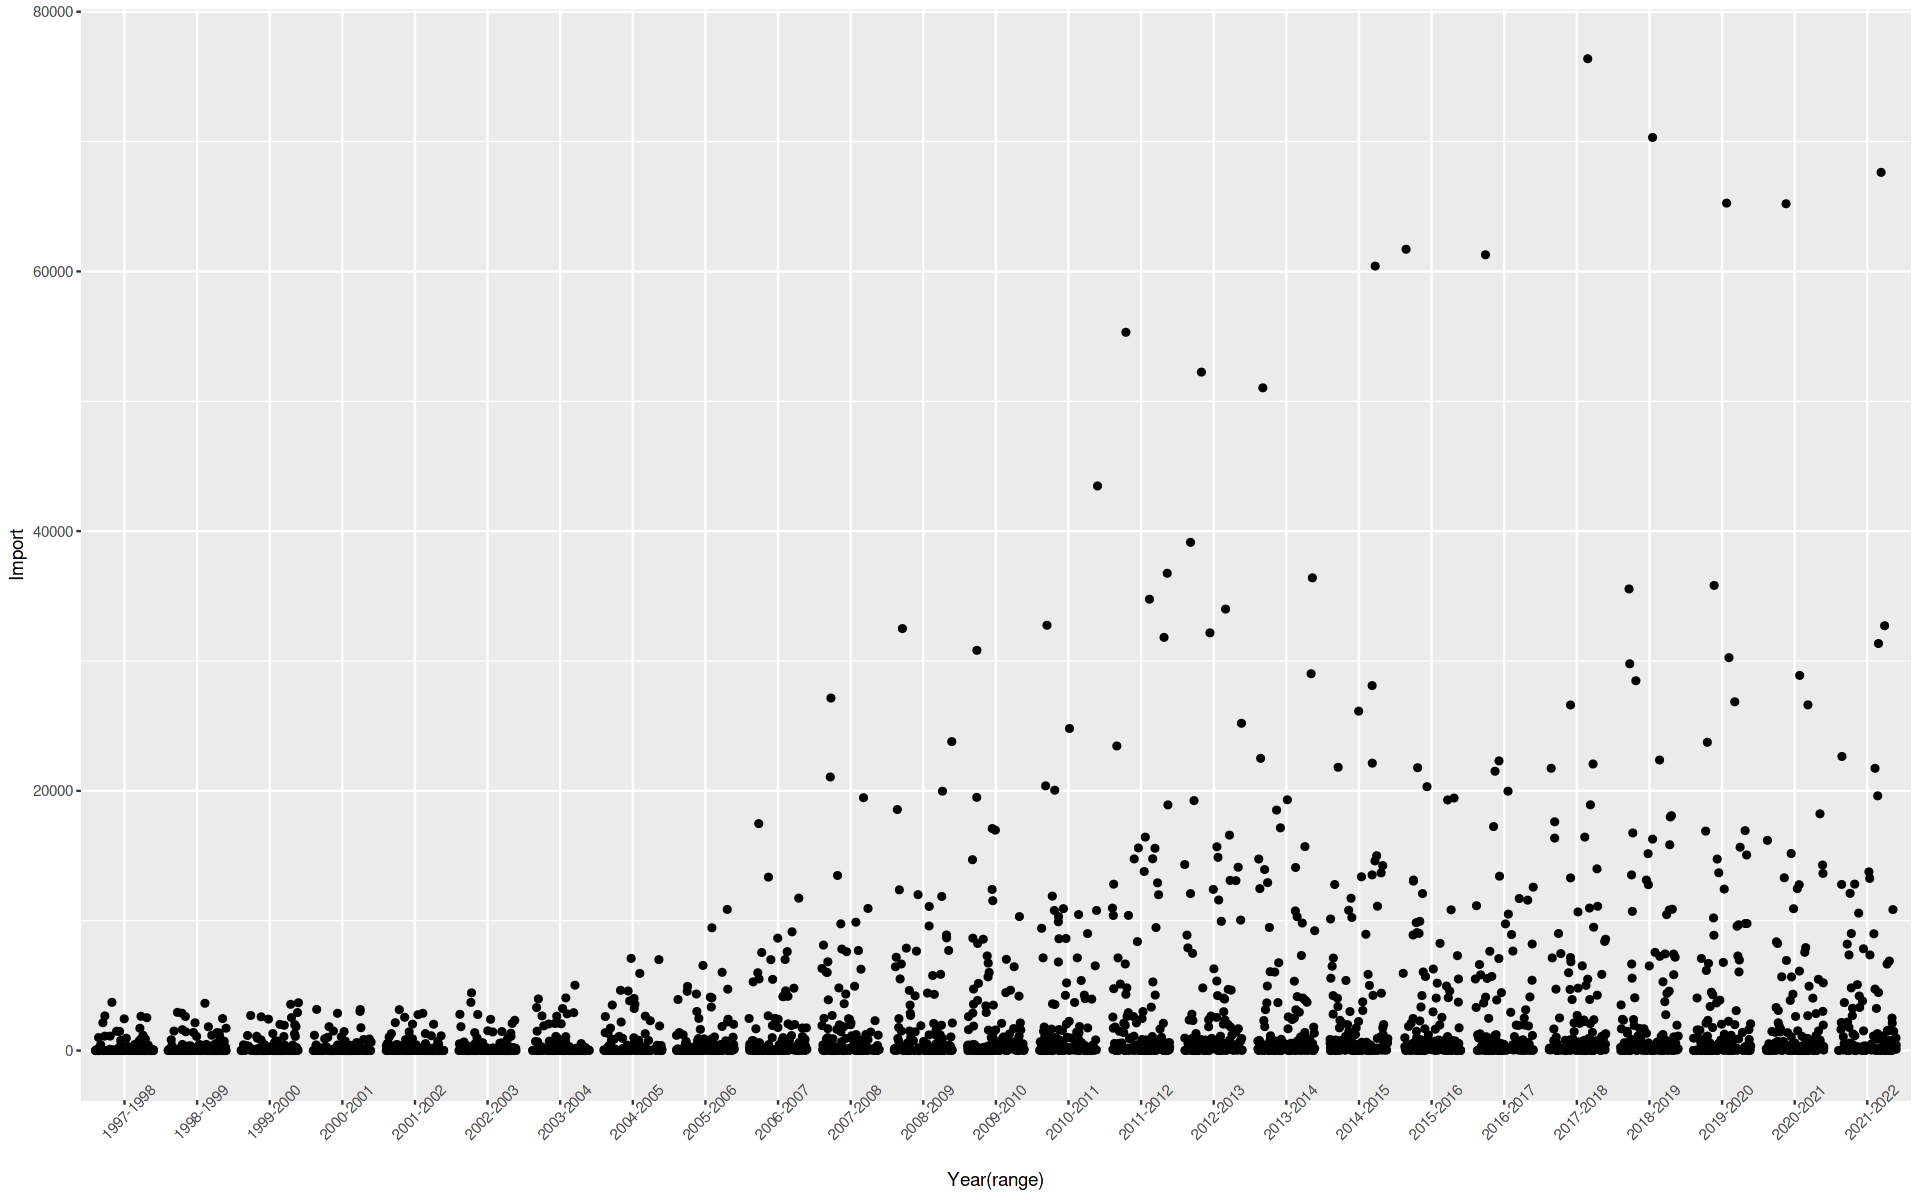

In [11]:
options(repr.plot.width = 16, repr.plot.height = 10)
ggplot(trade_data, mapping = aes(x=`Year(range)`, y=`Import`)) + 
  geom_jitter() + 
  theme(axis.text.x = element_text(angle = 45))

#### Total import for each year

In [12]:
trade_data %>%
  group_by(`Year(range)`) %>%
  summarise(total_import = sum(`Import`)) %>%
  arrange(-total_import)

Year(range),total_import
<chr>,<dbl>
2018-2019,505477.55
2011-2012,480300.37
2012-2013,480172.81
2019-2020,467391.03
2017-2018,446959.72
2013-2014,438311.74
2021-2022,436529.95
2014-2015,432294.83
2020-2021,390263.35


#### Scatter plot for export over years

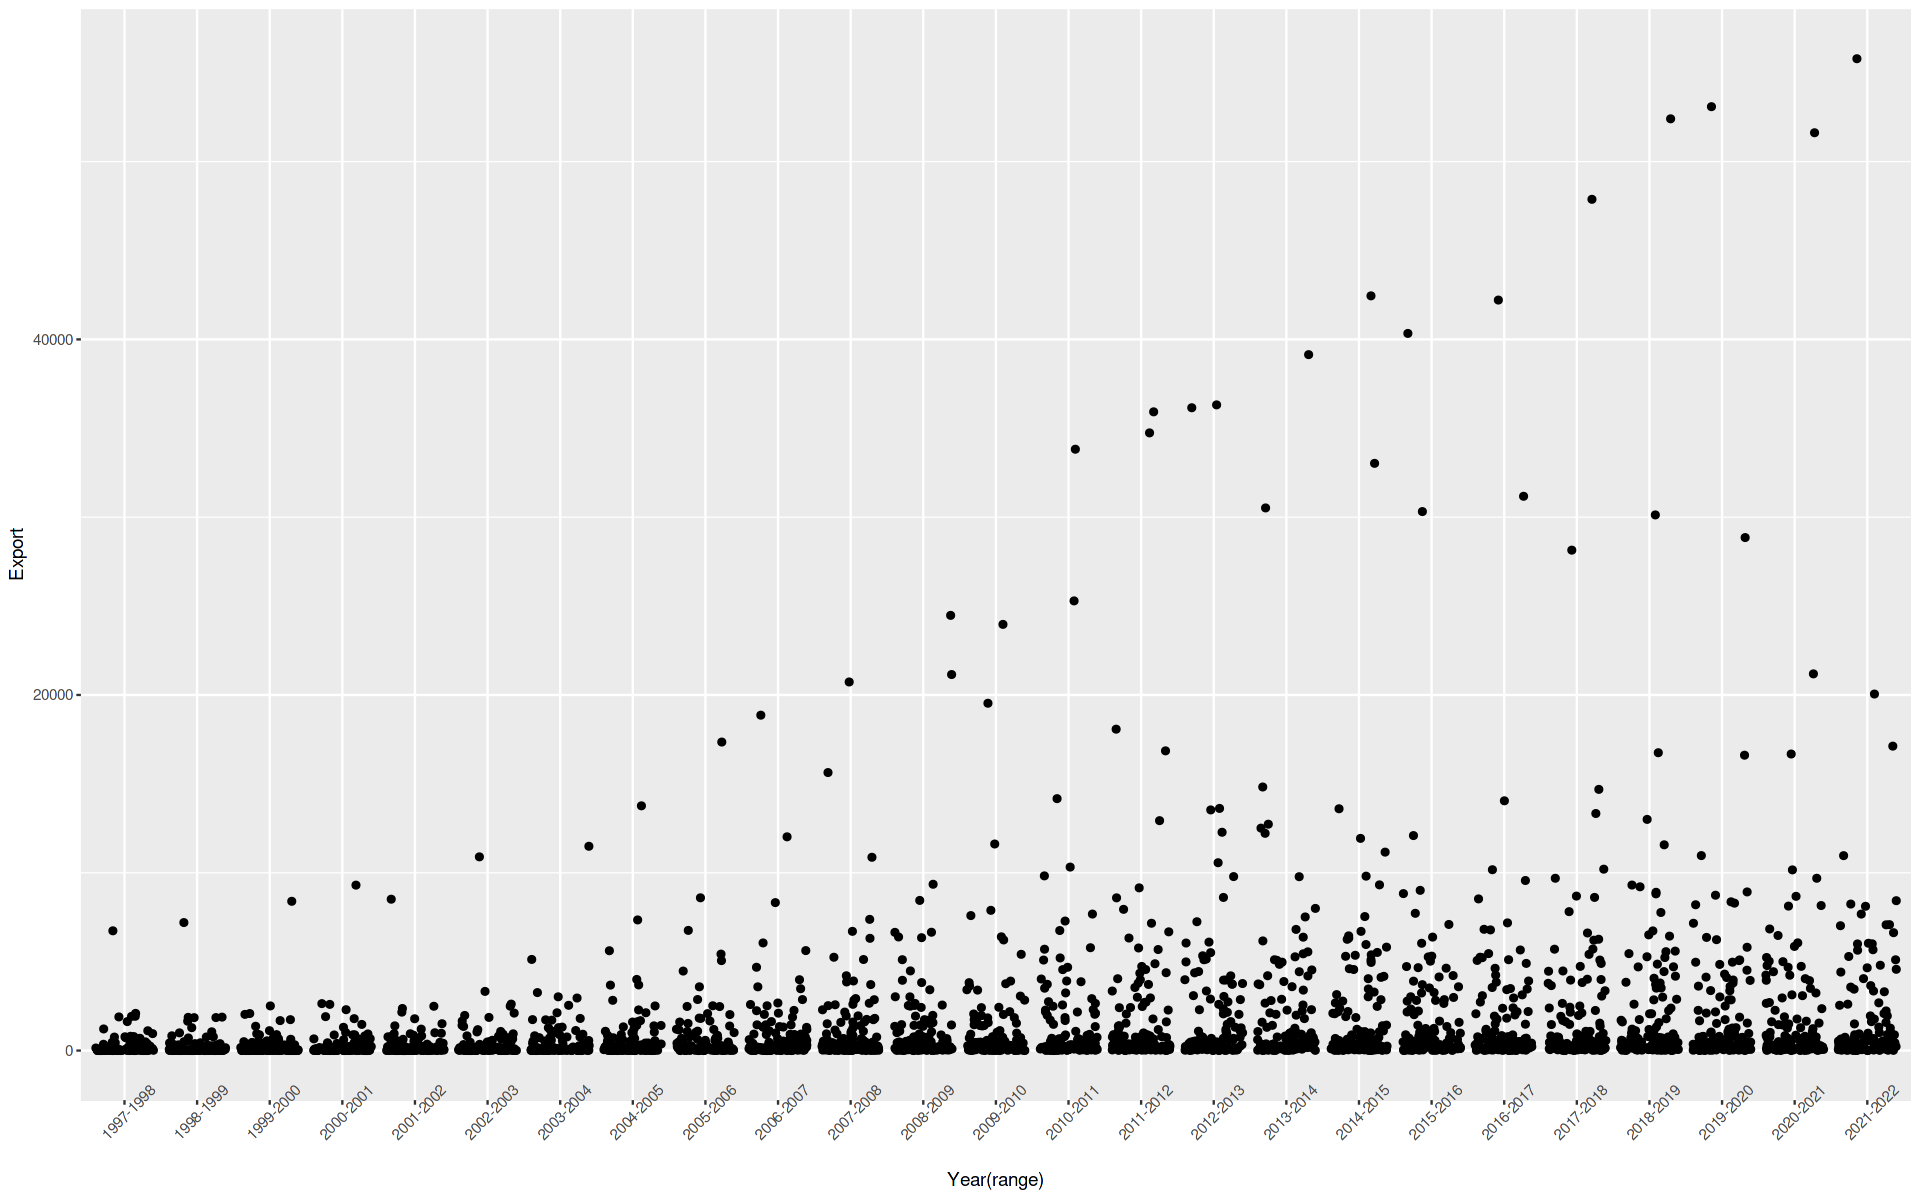

In [13]:
ggplot(trade_data, mapping = aes(x=`Year(range)`, y=`Export`)) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45))

#### Total export for each year

In [14]:
trade_data %>%
  group_by(`Year(range)`) %>%
  summarise(total_export = sum(`Export`)) %>%
  arrange(-total_export)

Year(range),total_export
<chr>,<dbl>
2018-2019,322759.51
2019-2020,306228.66
2014-2015,301827.47
2021-2022,300094.07
2013-2014,299238.97
2017-2018,297409.70
2012-2013,289373.70
2020-2021,286705.65
2011-2012,284561.82


#### Import vs Export

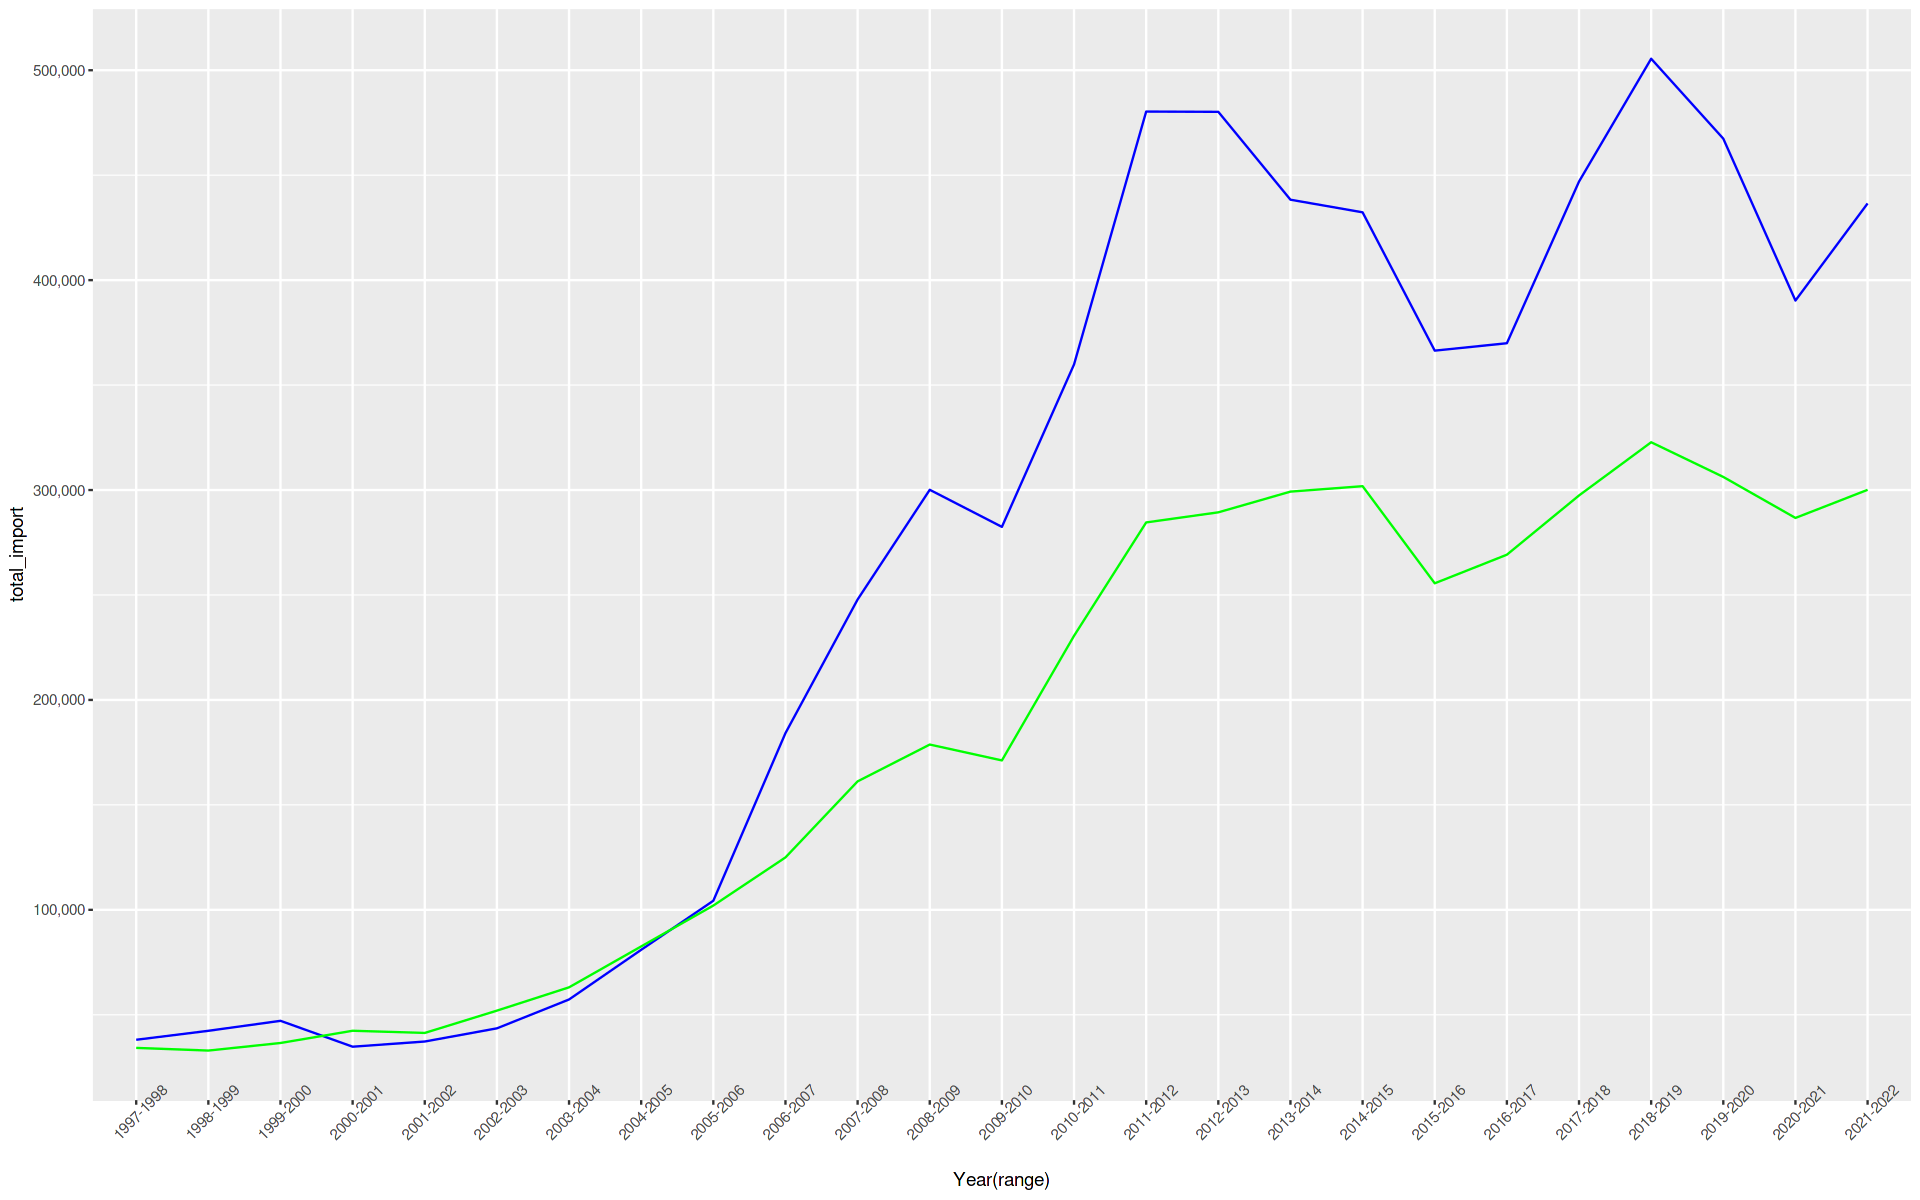

In [15]:
trade_data %>%
  group_by(`Year(range)`) %>%
  summarise(total_import = sum(`Import`), total_export = sum(`Export`)) %>%
  ggplot() + 
  geom_line(mapping = aes(x=`Year(range)`, y=total_import,group=1), color = "blue") +
  geom_line(mapping = aes(x=`Year(range)`, y=total_export,group=1), color = "green") +
  scale_y_continuous(labels = comma) +
  theme(axis.text.x = element_text(angle = 45))

#### Countries that accounts to largest Total Trade

In [16]:
top_10_countries <- trade_data %>%
  group_by(Country) %>%
  summarise(total_trade=sum(`Total Trade`)) %>%
  arrange(-total_trade) %>%
  slice_head(n=10)

top_10_countries_data <- trade_data %>%
  filter(Country %in% top_10_countries$Country)

top_10_countries

Country,total_trade
<chr>,<dbl>
U S A,1121730.0
CHINA P RP,1107734.8
U ARAB EMTS,896229.5
SAUDI ARAB,497559.6
SWITZERLAND,358944.2
GERMANY,356481.8
HONG KONG,351508.7
SINGAPORE,333687.3
KOREA RP,280811.9


#### Largest import

In [17]:
trade_data %>%
  group_by(Country) %>%
  summarise(total_import=sum(`Import`)) %>%
  arrange(-total_import) %>%
  slice_head(n=10)

Country,total_import
<chr>,<dbl>
CHINA P RP,870066.9
U ARAB EMTS,430097.4
U S A,426685.7
SAUDI ARAB,388376.8
SWITZERLAND,339296.4
IRAQ,229874.9
GERMANY,223007.6
KOREA RP,208380.5
INDONESIA,206433.2


#### Largest export

In [18]:
trade_data %>%
  group_by(Country) %>%
  summarise(total_export=sum(`Export`)) %>%
  arrange(-total_export) %>%
  slice_head(n=10)

Country,total_export
<chr>,<dbl>
U S A,695044.3
U ARAB EMTS,466132.1
CHINA P RP,237667.8
HONG KONG,196160.1
SINGAPORE,173775.8
U K,154418.9
GERMANY,133474.2
NETHERLAND,120819.0
SAUDI ARAB,109182.8


#### Highest Trade Balance

In [19]:
trade_data %>%
  group_by(Country) %>%
  summarise(total_trade_balance=sum(`Trade Balance`)) %>%
  arrange(-total_trade_balance) %>%
  slice_head(n=10)

Country,total_trade_balance
<chr>,<dbl>
U S A,268358.63
BANGLADESH PR,92901.14
NETHERLAND,75554.65
NEPAL,58538.66
SRI LANKA DSR,58121.10
HONG KONG,40811.47
TURKEY,40426.17
U K,40337.82
KENYA,37310.61


#### Lowest Trade Balance

In [20]:
trade_data %>%
  group_by(Country) %>%
  summarise(total_trade_balance=sum(`Trade Balance`)) %>%
  arrange(total_trade_balance) %>%
  slice_head(n=10)

Country,total_trade_balance
<chr>,<dbl>
CHINA P RP,-632399.1
SWITZERLAND,-319648.5
SAUDI ARAB,-279194.0
IRAQ,-212682.5
AUSTRALIA,-146798.1
KUWAIT,-136732.7
KOREA RP,-135949.1
INDONESIA,-132724.1
QATAR,-127695.4


#### Import vs Export for Top 10 Countries with highest total trade

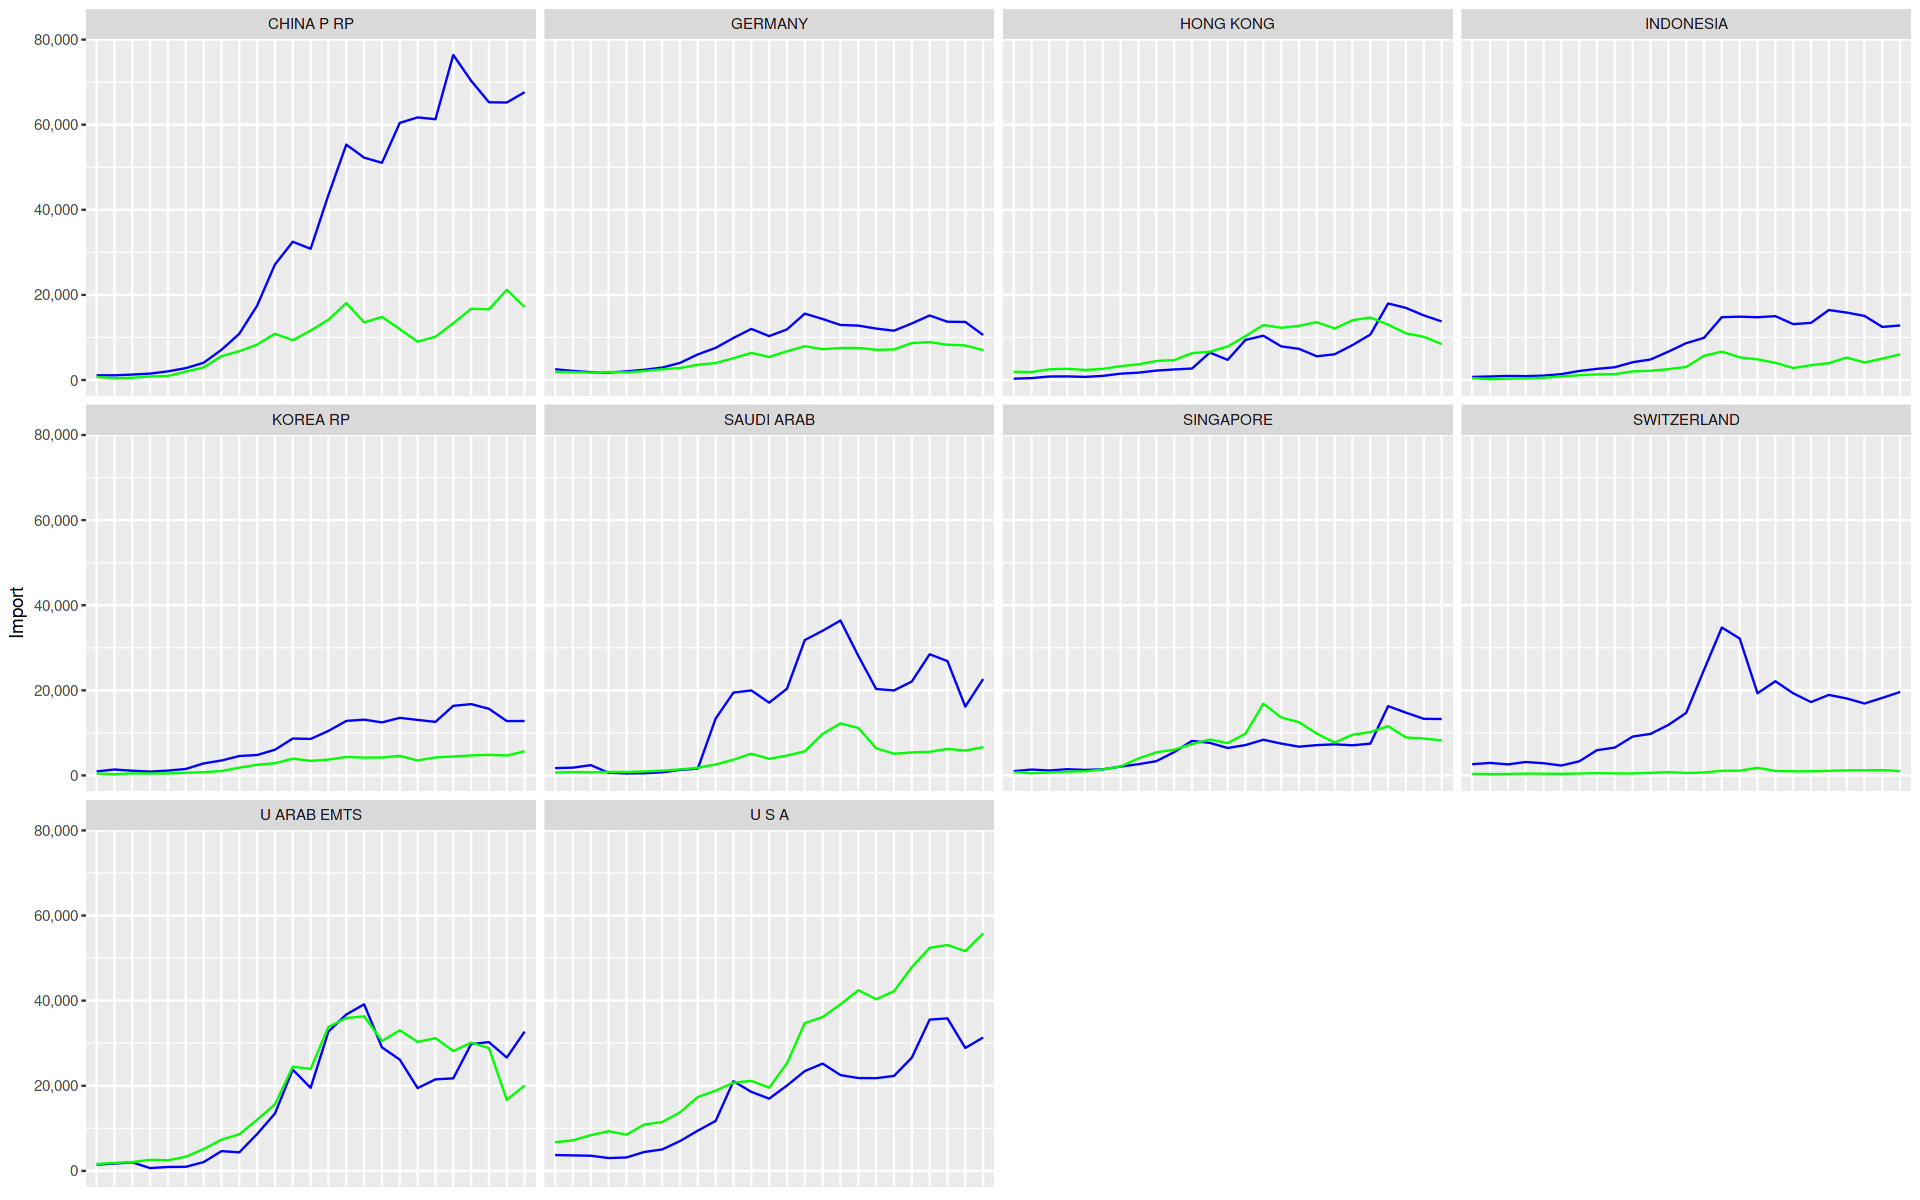

In [21]:
top_10_countries_data %>%
  ggplot() +
  geom_line(mapping = aes(x=`Year(range)`, y=`Import`,group=1),color = "blue") +
  geom_line(mapping = aes(x=`Year(range)`, y=`Export`,group=1),color = "green") +
  scale_y_continuous(labels = comma) +
  theme(
    axis.title.x=element_blank(),
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
  ) +
  facet_wrap(~Country)

#### Trade Balance for Top 10 Countries with highest total trade

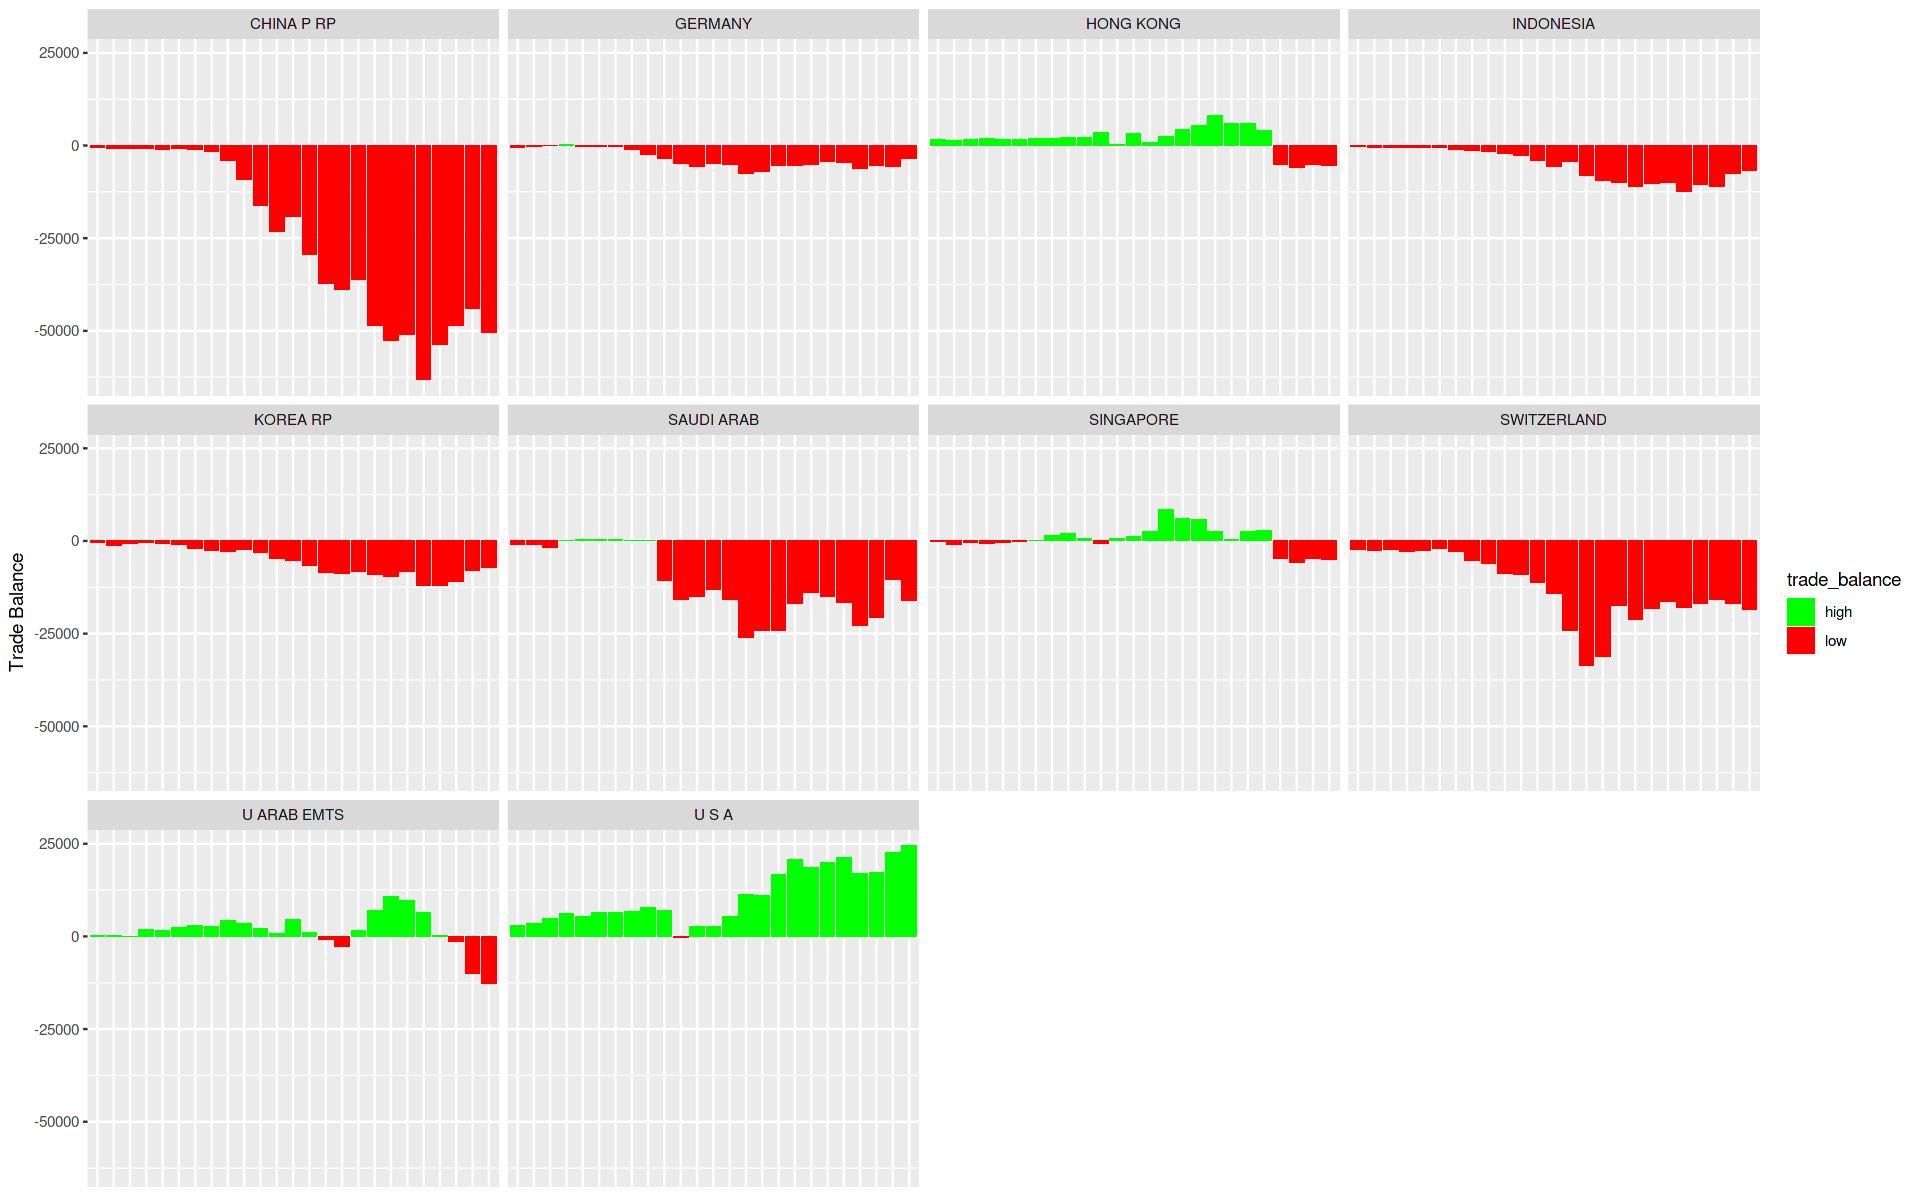

In [22]:
top_10_countries_data %>%
  mutate(trade_balance = ifelse(`Trade Balance`>0, "high", "low")) %>%
  ggplot(mapping = aes(x=`Year(range)`,y=`Trade Balance`)) +
  geom_bar(stat='identity',aes(fill = trade_balance)) +
  theme(
    axis.title.x=element_blank(),
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
  ) +
  scale_fill_manual(values=c("green","red")) +
  facet_wrap(~Country)

#### Tree map for Countries sized by Total Trade

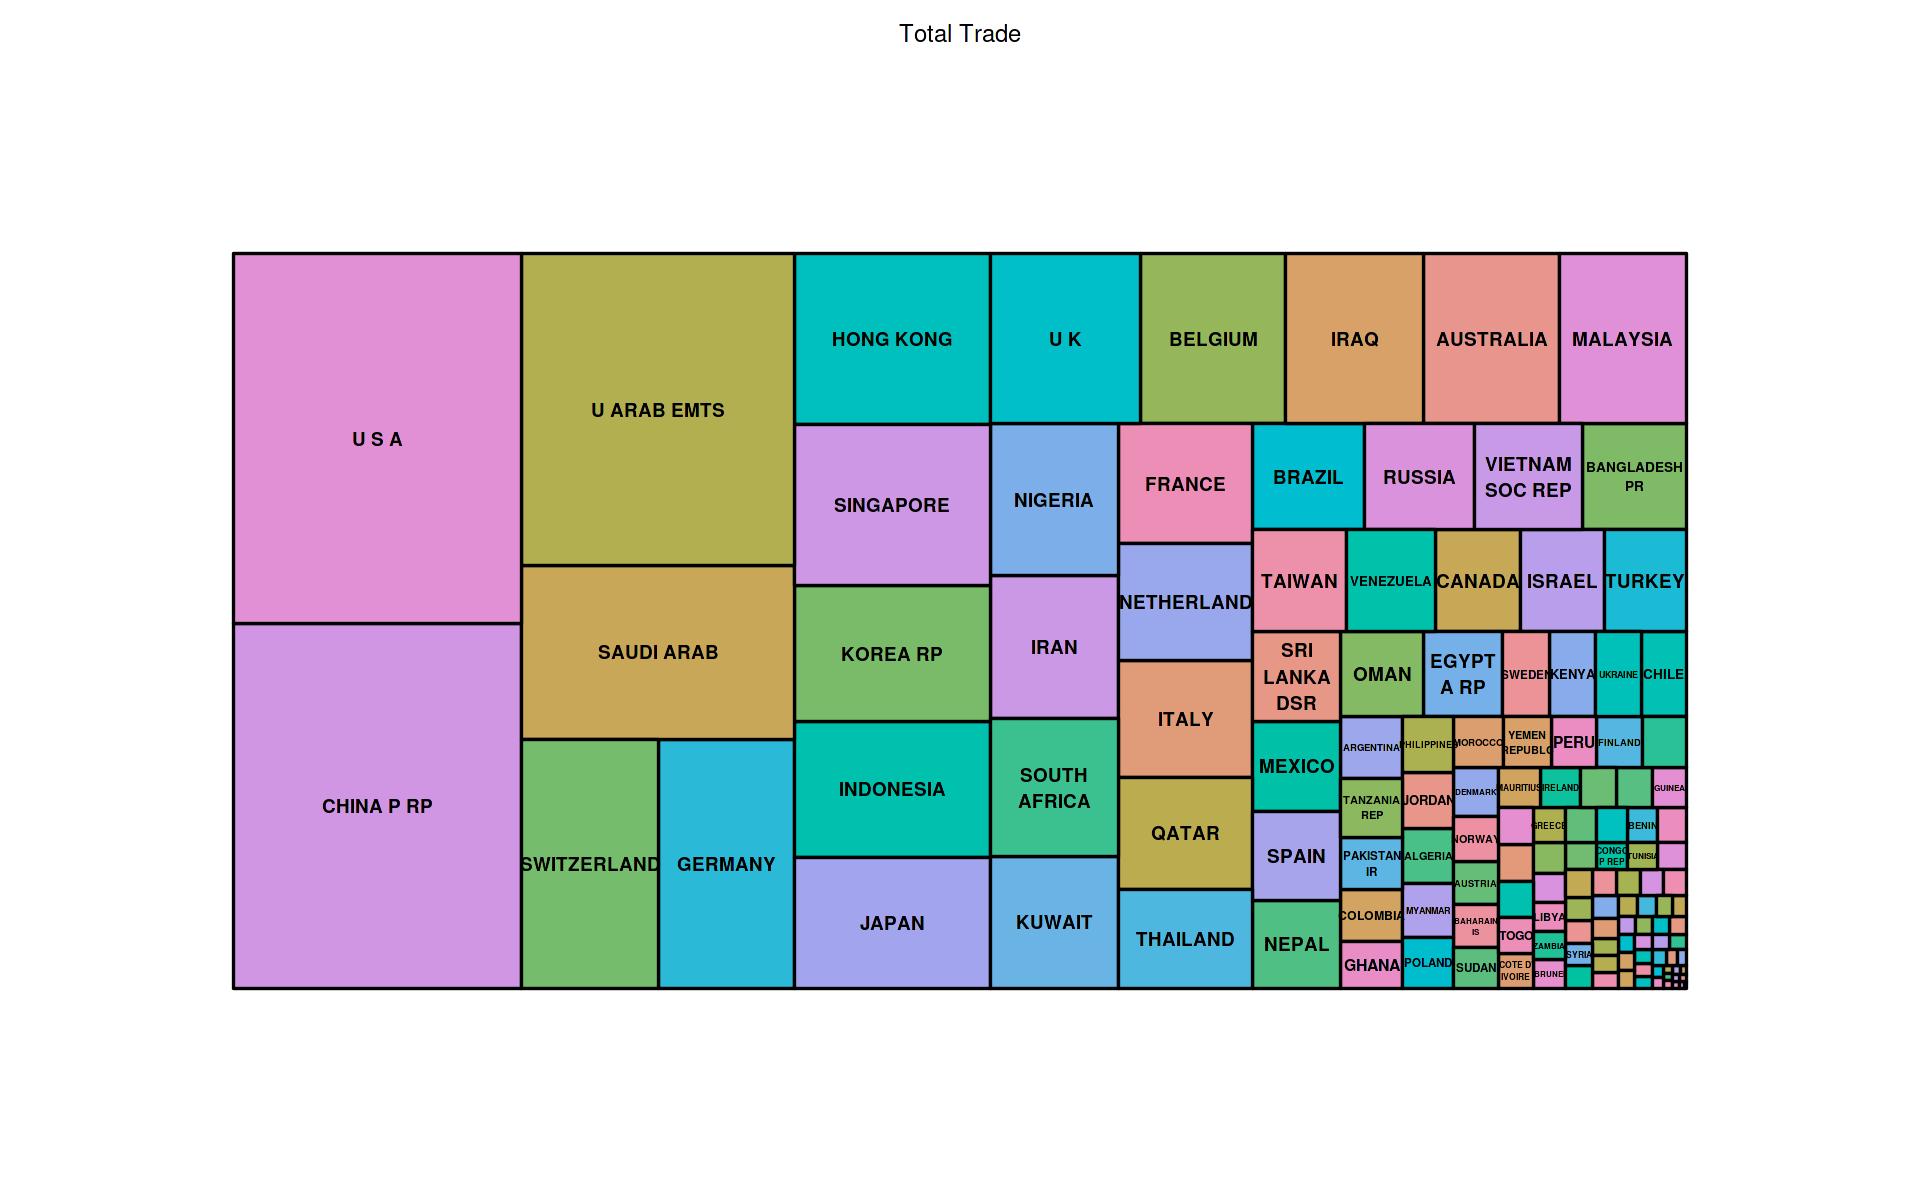

In [23]:
treemap(trade_data, "Country", "Total Trade")